#Problem Statement
#Problem Sentimental Analysis
**1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)**

#1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2.import dataset

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [7]:
import chardet
# Function to detect encoding using chardet
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

# File path
file_path = 'Elon_musk.csv'

# Detect encoding
detected_encoding = detect_encoding(file_path)

# Read CSV with detected encoding
tweets = pd.read_csv(file_path, encoding=detected_encoding)

# Display the data
print(tweets)


      Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]


In [8]:
tweets

Unnamed: 0                                               Text
0              1                             @kunalb11 I’m an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [9]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

Text
0                                @kunalb11 I’m an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

#Data Exploration

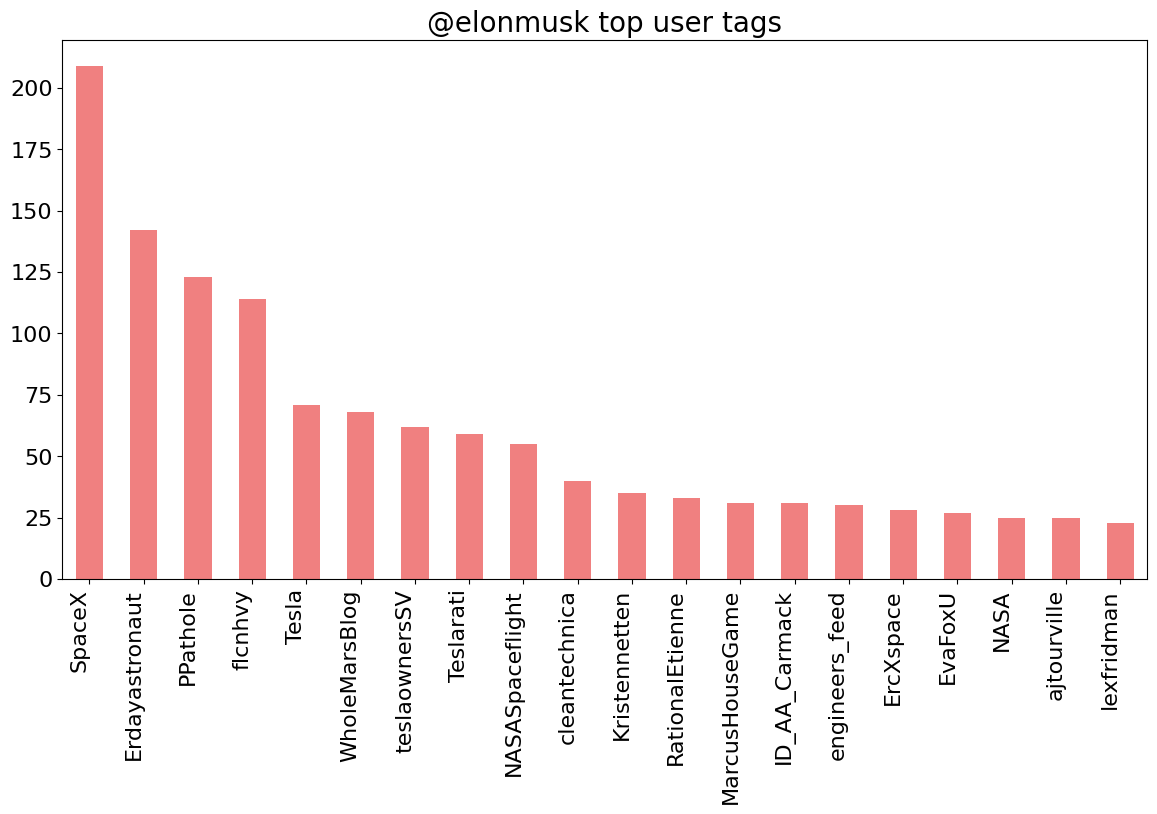

In [10]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

#4. BasicText Preprocessing

**Cleaning the text by removing irrelevant information**

In [11]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

Text
0                                         im an alien
1   idaacarmack ray tracing on cyberpunk with hdr ...
2                    joerogan spotify great interview
3                              doge is underestimated
4   teslacn congratulations tesla china for amazin...
5                           happy new year of the ox 
6   frodo was the underdoge\nall thought he would ...
7                    owensparks flcnhvy  haha thanks 
8   flcnhvy  indeed tweets definitely do not repre...
9    the most entertaining outcome is the most likely
10                        givedirectly just sent some

#Word Frequency

In [13]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
dtype: int64

**Removing Stopwords**

In [15]:
import nltk

# Download the 'stopwords' resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#Word Frequency after Removal of Stopwords

In [17]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
dtype: int64

#5. Basic Feature Extaction

**Count vectoriser tells the frequency of a word.**

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming 'tweets' is your DataFrame
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(tweets["Text"])

word_freq_df = pd.DataFrame({
    'term': vectorizer.get_feature_names_out(),
    'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()
})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)


term  occurrences  frequency
0         aber            1   0.000076
1         able            6   0.000453
2          abo            1   0.000076
3       aboard            1   0.000076
4        abort            3   0.000227
5      absence            1   0.000076
6     absolute            1   0.000076
7   absolutely           15   0.001133
8       absorb            1   0.000076
9   absorption            1   0.000076
10      absurd            2   0.000151

**TFIDF - Term frequency inverse Document Frequencyt**

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'tweets' is your DataFrame
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)  # keep top 1000 words
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()

# Rest of your code
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)
df

able  abort  absolutely  access  accurate  actual  actually  adamklotz  \
0      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
2      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
3      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
4      0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
...    ...    ...         ...     ...       ...     ...       ...        ...   
1994   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1995   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1996   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1997   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   
1998   0.0    0.0         0.0     0.0       0.0     0.0       0.0        0.0   

      add  adding  ...  yeah      year  years  yes  yesterdays  youre  \
0     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
2     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
3     0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
4     0.0     0.0  ...   0.0  0.356742    0.0  0.0         0.0    0.0   
...   ...     ...  ...   ...       ...    ...  ...         ...    ...   
1994  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1995  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1996  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1997  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   
1998  0.0     0.0  ...   0.0  0.000000    0.0  0.0         0.0    0.0   

      yourfavgas  yup  zero  zone  
0            0.0  0.0   0.0   0.0  
1            0.0  0.0   0.0   0.0  
2            0.0  0.0   0.0   0.0  
3            0.0  0.0   0.0   0.0  
4            0.0  0.0   0.0   0.0  
...          ...  ...   ...   ...  
1994         0.0  0.0   0.0   0.0  
1995         0.0  0.0   0.0   0.0  
1996         0.0  0.0   0.0   0.0  
1997         0.0  0.0   0.0   0.0  
1998         0.0  0.0   0.0   0.0  

[1999 rows x 1000 columns]

#N-gram
#Bi-gram

In [26]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

Bi-gram  Freq
0                 rt spacex    71
1             spacex falcon    17
2     erdayastronaut spacex    16
3               pretty much    12
4                   rt nasa    12
5              waemd spacex    11
6               giga berlin    10
7               first stage    10
8   teslaratiteam teslarati    10
9               nasa spacex     9
10             falcon first     9

#Bi-gram plot

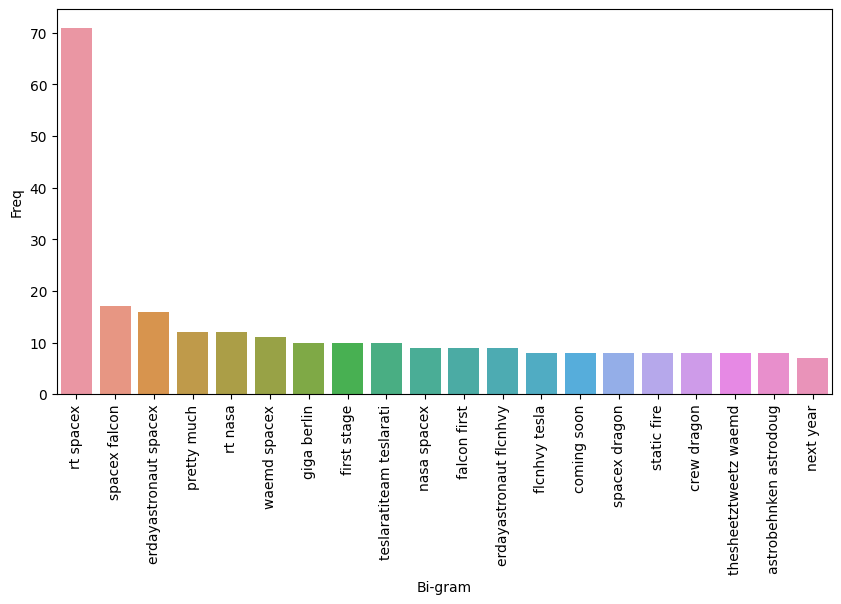

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#Tri-gram

In [29]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

Tri-gram  Freq
0                        rt spacex falcon    17
1                      falcon first stage     9
2                     spacex falcon first     8
3            thesheetztweetz waemd spacex     8
4                       course still love     7
5          ppathole thesheetztweetz waemd     7
6             waemd spacex spacexstarlink     7
7                      first stage landed     6
8                       rt spacex liftoff     6
9   spacex spacexstarlink wanationalguard     6
10    spacex felixschlang marcushousegame     5

#Tri-gram plot

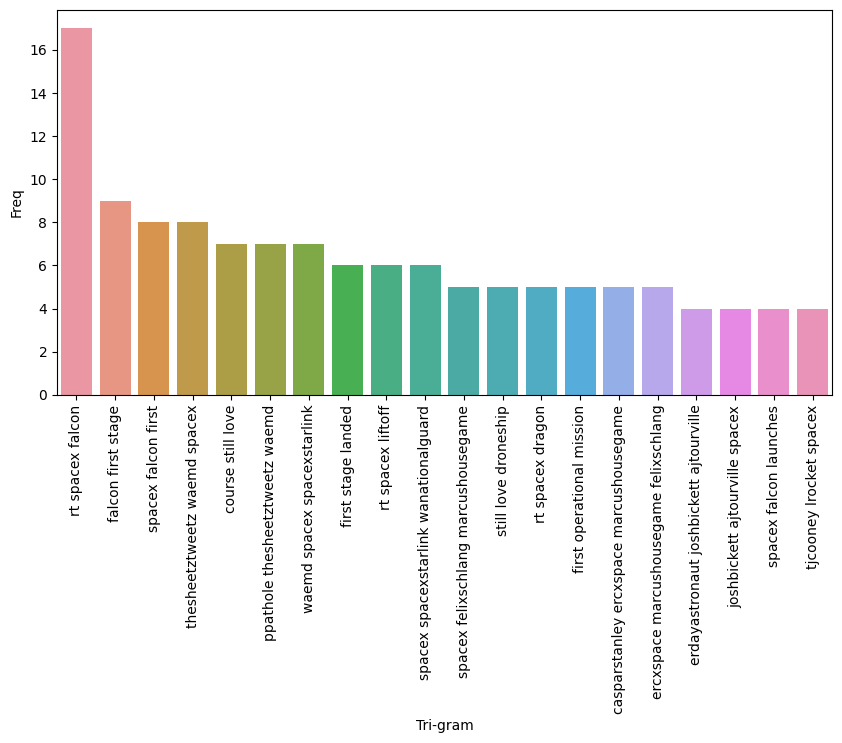

In [31]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);


#Creating a Worlcloud

In [32]:
string_Total = " ".join(tweets["Text"])

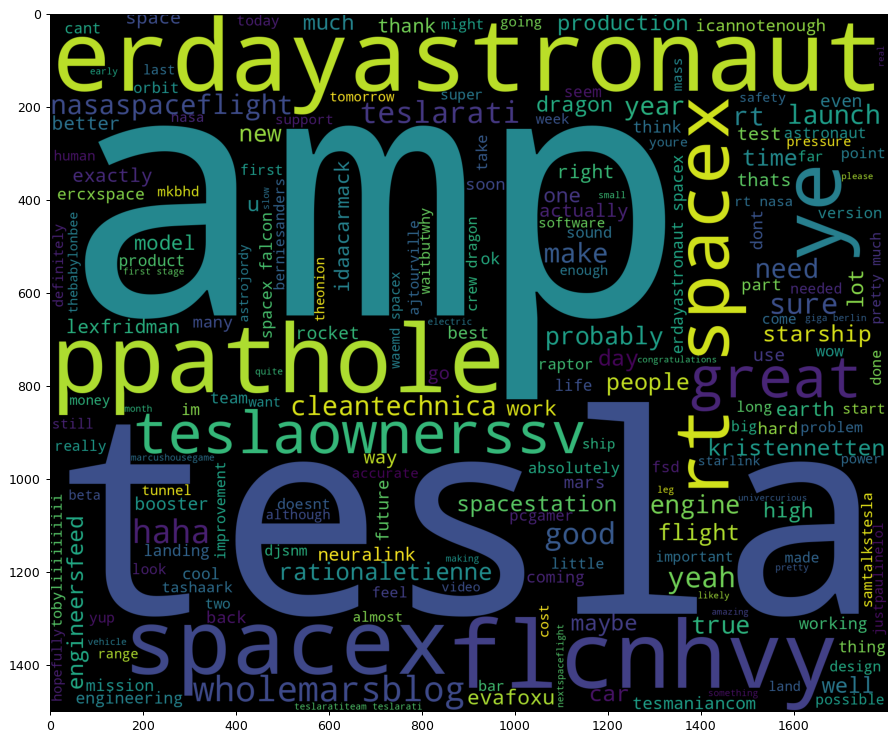

In [33]:
#wordcloud for entire corpus
from wordcloud import WordCloud
plt.figure(figsize=(12,12),dpi=90)
wordcloud_stw = WordCloud(background_color= 'black', width = 1800, height = 1500).generate(string_Total)
plt.imshow(wordcloud_stw);

#Subjectivity and Polarity

In [34]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

Text  subjectivity  polarity
0                                            im alien      0.750000 -0.250000
1   idaacarmack ray tracing cyberpunk hdr nextleve...      0.000000  0.000000
2                    joerogan spotify great interview      0.750000  0.800000
3                                 doge underestimated      0.000000  0.000000
4   teslacn congratulations tesla china amazing ex...      0.322222  0.200000
5                                   happy new year ox      0.727273  0.468182
6   frodo underdoge thought would fail httpstcozgx...      0.300000 -0.500000
7                      owensparks flcnhvy haha thanks      0.250000  0.200000
8   flcnhvy indeed tweets definitely represent rea...      0.500000  0.000000
9                         entertaining outcome likely      0.850000  0.250000
10                                  givedirectly sent      0.000000  0.000000

#Creating a Worlcloud

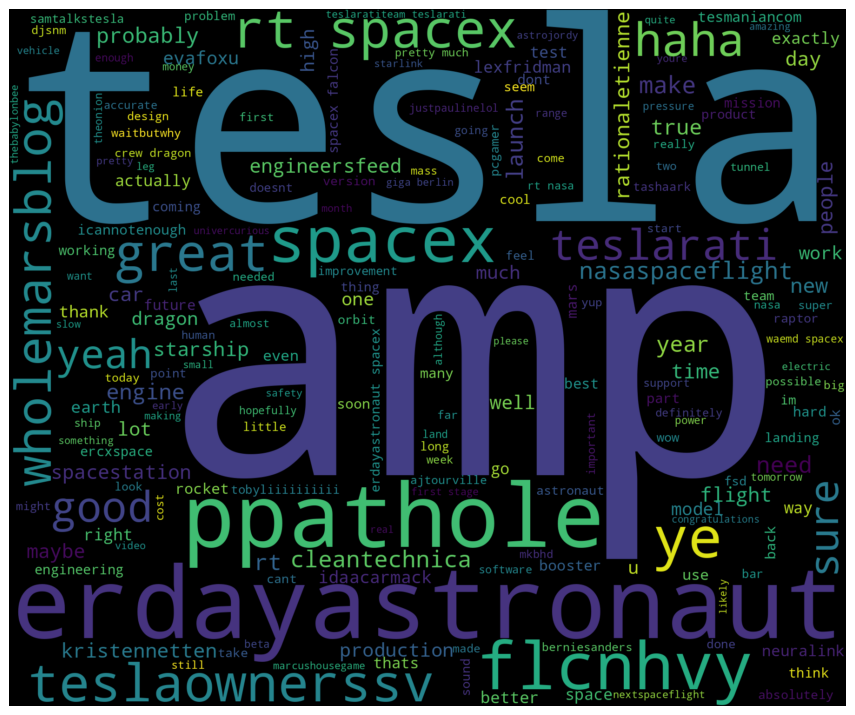

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [36]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [37]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [38]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


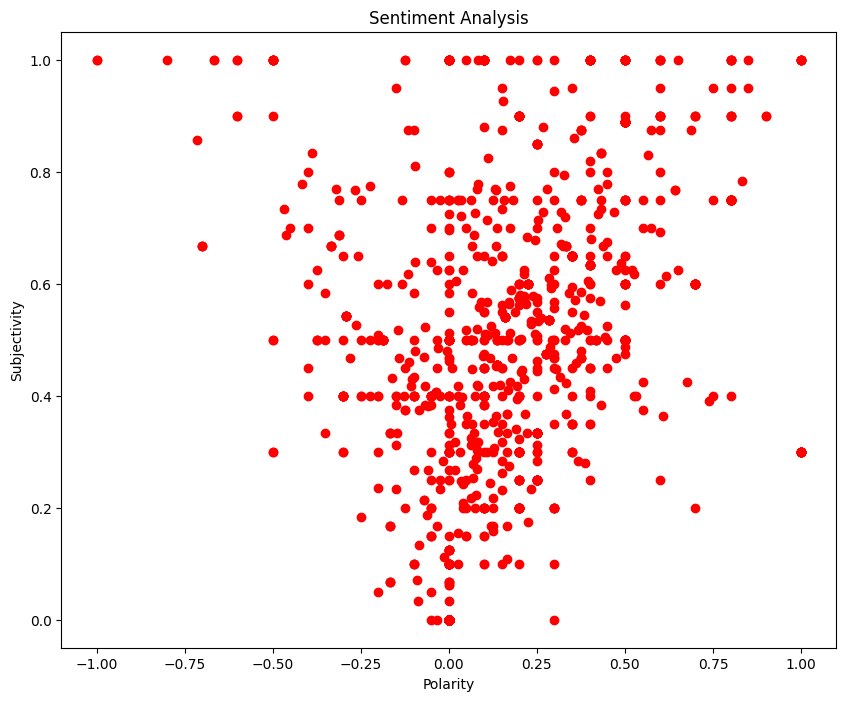

In [39]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [40]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

#Colclusion: Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

# 2

#Problem Statement
#Perform sentimental analysis:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

#1.import Libraries

In [2]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

#2. Multi-page web-scraping

In [3]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/53'}

**Looping through multiple pages**

In [4]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [6]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

#Save results to a Dataframe, then export as CSV

In [7]:
df = pd.DataFrame(reviewlist)
df

Title  Rating  \
0                        5.0 out of 5 stars\nExcellent     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                    5.0 out of 5 stars\nAmazing watch     5.0   
3                5.0 out of 5 stars\nBest Budget watch     5.0   
4    3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   
..                                                 ...     ...   
105               4.0 out of 5 stars\nMust know these.     4.0   
106                            4.0 out of 5 stars\n👌👌👌     4.0   
107                           4.0 out of 5 stars\nGood     4.0   
108                   5.0 out of 5 stars\nGood product     5.0   
109                            4.0 out of 5 stars\nNic     4.0   

                                                Review  \
0                 Good smart watch. Still working well   
1    This smart (model Boat extend plus) watch is f...   
2    Blood pressure calculation  feature is missing...   
3    The media could not be loaded.\n              ...   
4    1. Good for Bluetooth calling but very difficu...   
..                                                 ...   
105  Good value for money but needs to improve in a...   
106                                               👌👍👍👍   
107                                                 Ok   
108                      Battery backup rightI like it   
109                                 Verry good product   

                               Review_Date  
0    Reviewed in India on 26 December 2023  
1      Reviewed in India on 27 August 2023  
2    Reviewed in India on 18 December 2023  
3      Reviewed in India on 12 August 2021  
4    Reviewed in India on 15 November 2023  
..                                     ...  
105    Reviewed in India on 7 October 2023  
106   Reviewed in India on 12 October 2023  
107    Reviewed in India on 9 October 2023  
108   Reviewed in India on 3 December 2023  
109   Reviewed in India on 15 October 2023  

[110 rows x 4 columns]

In [8]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [9]:
df.head(50)

Title  Rating  \
0                       5.0 out of 5 stars\nExcellent     5.0   
1                   4.0 out of 5 stars\nGood product.     4.0   
2                   5.0 out of 5 stars\nAmazing watch     5.0   
3               5.0 out of 5 stars\nBest Budget watch     5.0   
4   3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   
5   4.0 out of 5 stars\nPremium quality Value for ...     4.0   
6           5.0 out of 5 stars\nLena toh boAt hi Lena     5.0   
7   3.0 out of 5 stars\nGood build quality & displ...     3.0   
8             3.0 out of 5 stars\nNOt worth the money     3.0   
9   4.0 out of 5 stars\nEverything is very good ex...     4.0   
10                      5.0 out of 5 stars\nExcellent     5.0   
11                  4.0 out of 5 stars\nGood product.     4.0   
12                  5.0 out of 5 stars\nAmazing watch     5.0   
13              5.0 out of 5 stars\nBest Budget watch     5.0   
14  3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   
15  4.0 out of 5 stars\nPremium quality Value for ...     4.0   
16          5.0 out of 5 stars\nLena toh boAt hi Lena     5.0   
17  3.0 out of 5 stars\nGood build quality & displ...     3.0   
18            3.0 out of 5 stars\nNOt worth the money     3.0   
19  4.0 out of 5 stars\nEverything is very good ex...     4.0   
20  4.0 out of 5 stars\nGood budget smart watch wi...     4.0   
21                      4.0 out of 5 stars\nVery good     4.0   
22                      4.0 out of 5 stars\nVery good     4.0   
23                        4.0 out of 5 stars\nQuality     4.0   
24                   4.0 out of 5 stars\nProduct good     4.0   
25                           4.0 out of 5 stars\nGood     4.0   
26                           4.0 out of 5 stars\nGood     4.0   
27                    4.0 out of 5 stars\nGood enough     4.0   
28      4.0 out of 5 stars\nSailing in the same boat…     4.0   
29               4.0 out of 5 stars\nCalling facility     4.0   
30    4.0 out of 5 stars\nAlexa is not working proper     4.0   
31                           4.0 out of 5 stars\nGood     4.0   
32                4.0 out of 5 stars\nAmazing product     4.0   
33  4.0 out of 5 stars\nBest product.Buyers most b...     4.0   
34                           4.0 out of 5 stars\nGood     4.0   
35                     4.0 out of 5 stars\nSmartwatch     4.0   
36         4.0 out of 5 stars\nRecharging with magnet     4.0   
37            4.0 out of 5 stars\nThis watch was good     4.0   
38                           4.0 out of 5 stars\nGood     4.0   
39                     4.0 out of 5 stars\nBOAT WATCH     4.0   
40                     4.0 out of 5 stars\nBT Calling     4.0   
41                     4.0 out of 5 stars\nboat watch     4.0   
42  4.0 out of 5 stars\nReally very light weight p...     4.0   
43               4.0 out of 5 stars\nPasand nahin Hai     4.0   
44  4.0 out of 5 stars\nachha hai par display Kam ...     4.0   
45                     4.0 out of 5 stars\nReal value     4.0   
46  4.0 out of 5 stars\nGood quality watch in budg...     4.0   
47               4.0 out of 5 stars\nGood smart watch     4.0   
48                4.0 out of 5 stars\nAwesome product     4.0   
49        4.0 out of 5 stars\nWorthy product in range     4.0   

                                               Review        Review_Date  
0                Good smart watch. Still working well   26 December 2023  
1   This smart (model Boat extend plus) watch is f...     27 August 2023  
2   Blood pressure calculation  feature is missing...   18 December 2023  
3   The media could not be loaded.\n              ...     12 August 2021  
4   1. Good for Bluetooth calling but very difficu...   15 November 2023  
5   Awesome design, sound and features. Also have ...    31 October 2023  
6   This incident happened on my birthday last mon...   30 November 2023  
7   Skipping the parts mostly covered in other rev...      9 August 2022  
8   Review OverviewAverage2.7The Boat today launch...    

In [10]:
df.to_csv("BoatSmartWatch_Review.csv")

#3. Load Dataset

In [11]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Title  Rating  \
0                        5.0 out of 5 stars\nExcellent     5.0   
1                    4.0 out of 5 stars\nGood product.     4.0   
2                    5.0 out of 5 stars\nAmazing watch     5.0   
3                5.0 out of 5 stars\nBest Budget watch     5.0   
4    3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   
..                                                 ...     ...   
105               4.0 out of 5 stars\nMust know these.     4.0   
106                            4.0 out of 5 stars\n👌👌👌     4.0   
107                           4.0 out of 5 stars\nGood     4.0   
108                   5.0 out of 5 stars\nGood product     5.0   
109                            4.0 out of 5 stars\nNic     4.0   

                                                Review        Review_Date  
0                 Good smart watch. Still working well   26 December 2023  
1    This smart (model Boat extend plus) watch is f...     27 August 2023  
2    Blood pressure calculation  feature is missing...   18 December 2023  
3    The media could not be loaded.\n              ...     12 August 2021  
4    1. Good for Bluetooth calling but very difficu...   15 November 2023  
..                                                 ...                ...  
105  Good value for money but needs to improve in a...     7 October 2023  
106                                               👌👍👍👍    12 October 2023  
107                                                 Ok     9 October 2023  
108                      Battery backup rightI like it    3 December 2023  
109                                 Verry good product    15 October 2023  

[110 rows x 4 columns]

#4. Data Exploration

In [12]:
reviews.Rating.describe()

count    110.000000
mean       3.927273
std        0.501541
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


In [14]:
reviews.isna().sum()

Title          0
Rating         0
Review         2
Review_Date    0
dtype: int64

In [15]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

Title  Rating  \
0                      5.0 out of 5 stars\nExcellent     5.0   
1                  4.0 out of 5 stars\nGood product.     4.0   
2                  5.0 out of 5 stars\nAmazing watch     5.0   
3              5.0 out of 5 stars\nBest Budget watch     5.0   
4  3.0 out of 5 stars\nGood watch but bit tricky ...     3.0   

                                              Review        Review_Date  
0               Good smart watch. Still working well   26 December 2023  
1  This smart (model Boat extend plus) watch is f...     27 August 2023  
2  Blood pressure calculation  feature is missing...   18 December 2023  
3  The media could not be loaded.\n              ...     12 August 2021  
4  1. Good for Bluetooth calling but very difficu...   15 November 2023

#5. Data Visualization
**Date vs Review Count**

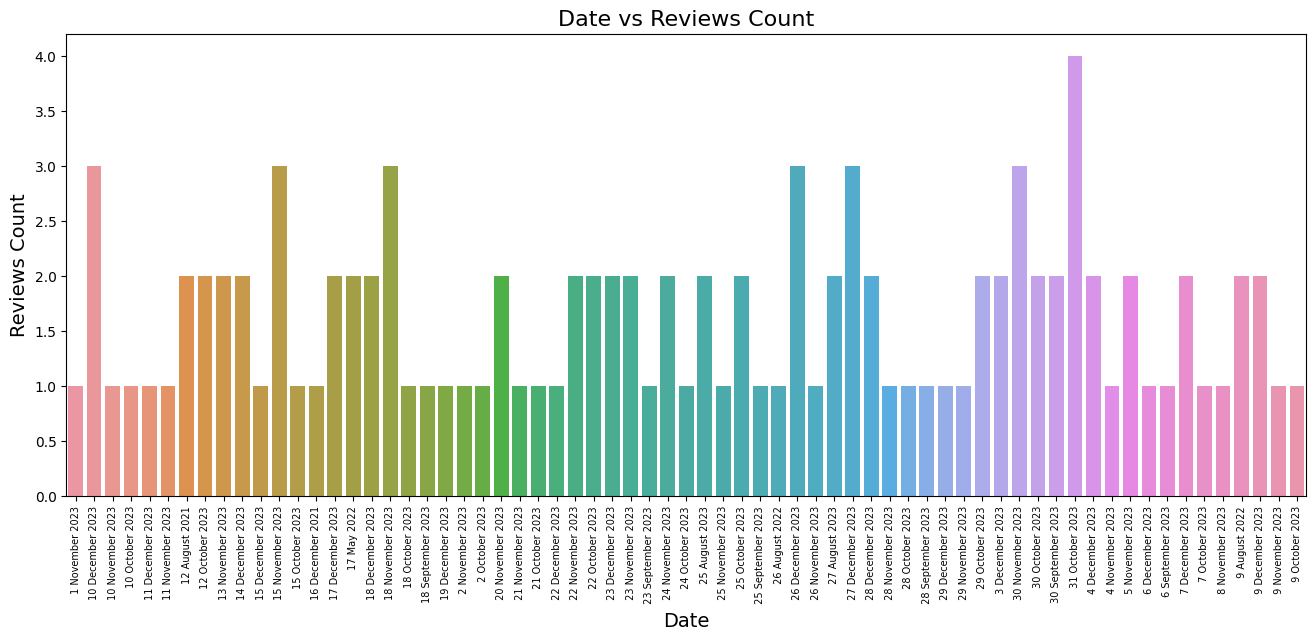

In [16]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

**Percentage of Ratings**

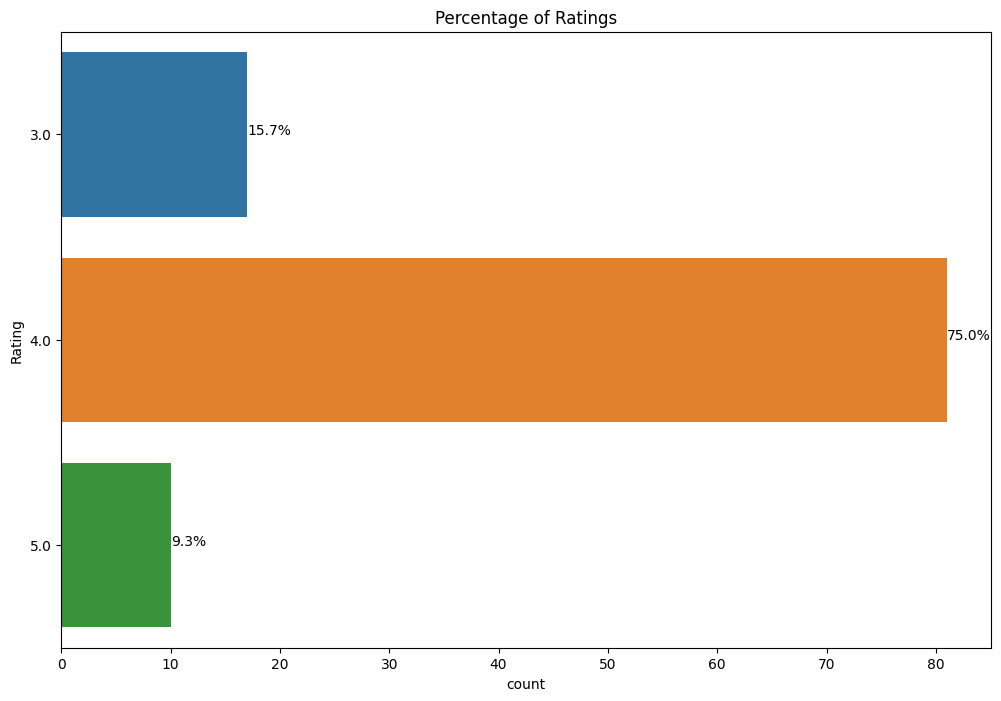

In [17]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

#6. BasicText Preprocessing for Sentiment Analysis

Spelling Correction

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                 Good smart watch. Still working well
1    His smart (model Coat extend plus) watch is sa...
2    Blood pressure calculation  feature is missing...
3    The media could not be loaded.\n              ...
4    1. Good for Bluetooth calling but very difficu...
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

Review
0                 Good smart watch. Still working well
1    This smart (model Boat extend plus) watch is f...
2    Blood pressure calculation  feature is missing...
3    The media could not be loaded.\n              ...
4    1. Good for Bluetooth calling but very difficu...
..                                                 ...
105  Good value for money but needs to improve in a...
106                                               👌👍👍👍
107                                                 Ok
108                      Battery backup rightI like it
109                                 Verry good product

[108 rows x 1 columns]

#Resetting index

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Lemmatizer

In [26]:
import nltk
nltk.download('wordnet',quiet=True)
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/108 [00:00<?, ?it/s]

In [27]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()


Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...

#7. Text Pre-processing Techniques

**A. Removing '@names'**

In [28]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [29]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...  
5  awesome design, sound features. also customiza...  
6  this incident happened birthday last month i l...  
7  skipping parts mostly covered reviews sponsore...  
8  review overviewaverage2.7the boat today launch...  
9  drawbacks•let's know first, much...1st deliver...

**B. Removing links (http | https)**

In [30]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...  
5  awesome design, sound features. also customiza...  
6  this incident happened birthday last month i l...  
7  skipping parts mostly covered reviews sponsore...  
8  review overviewaverage2.7the boat today launch...  
9  drawbacks•let's know first, much...1st deliver...

**C. Removing Review with empty text**

In [31]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...  
5  awesome design, sound features. also customiza...  
6  this incident happened birthday last month i l...  
7  skipping parts mostly covered reviews sponsore...  
8  review overviewaverage2.7the boat today launch...  
9  drawbacks•let's know first, much...1st deliver...

**D. Dropping duplicate rows**

In [32]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...  
5  awesome design, sound features. also customiza...  
6  this incident happened birthday last month i l...  
7  skipping parts mostly covered reviews sponsore...  
8  review overviewaverage2.7the boat today launch...  
9  drawbacks•let's know first, much...1st deliver...

**E. Function to remove emoji**

In [33]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [34]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  
0               good smart watch. still working well  
1  this smart (model boat extend plus) watch func...  
2  blood pressure calculation feature missing ..r...  
3  the media could loaded. used watch month now.....  
4  1. good bluetooth calling difficult use blueto...  
5  awesome design, sound features. also customiza...  
6  this incident happened birthday last month i l...  
7  skipping parts mostly covered reviews sponsore...  
8  review overviewaverage2.7the boat today launch...  
9  drawbacks•let's know first, much...1st deliver...

**F. Removing Stop words**

#G. Tokenize 'Clean_Reviews'

In [43]:
import nltk
nltk.download('punkt')
TextBlob(dataframe['Clean_Reviews'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [45]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0           [good, smart, watch, still, working, well]
1    [smart, model, boat, extend, plus, watch, func...
2    [blood, pressure, calculation, feature, missin...
3    [medium, could, loaded, used, watch, month, bo...
4    [good, bluetooth, calling, difficult, use, blu...
5    [awesome, design, sound, feature, also, custom...
6    [incident, happened, birthday, last, month, lo...
7    [skipping, part, mostly, covered, review, spon...
8    [review, overviewaverage, boat, today, launche...
9    [drawback, let, know, first, much, st, deliver...
Name: Clean_Reviews, dtype: object

In [46]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   
5  awesome design sound feature also customizable...   
6  incident happened birthday last month lost wat...   
7  skipping part mostly covered review sponsored ...   
8  review overviewaverage boat today launched boa...   
9  drawback let know first much st delivery late ...   

                                   Uncleaned_Reviews  \
0               good smart watch. still working well   
1  this smart (model boat extend plus) watch func...   
2  blood pressure calculation feature missing ..r...   
3  the media could loaded. used watch month now.....   
4  1. good bluetooth calling difficult use blueto...   
5  awesome design, sound features. also customiza...   
6  this incident happened birthday last month i l...   
7  skipping parts mostly covered reviews sponsore...   
8  review overviewaverage2.7the boat today launch...   
9  drawbacks•let's know first, much...1st deliver...   

                                   Tokenized_Reviews  
0         [good, smart, watch, still, working, well]  
1  [smart, model, boat, extend, plus, watch, func...  
2  [blood, pressure, calculation, feature, missin...  
3  [medium, could, loaded, used, watch, month, bo...  
4  [good, bluetooth, calling, difficult, use, blu...  
5  [awesome, design, sound, feature, also, custom...  
6  [incident, happened, birthday, last, month, lo...  
7  [skipping, part, mostly, covered, review, spon...  
8  [review, overviewaverage, boat, today, launche...  
9  [drawback, let, know, first, much, st, deliver...

#H. Converting words to Stemmer

In [47]:
stemmer = SnowballStemmer("english")

In [48]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0                     good smart watch still work well
1    smart model boat extend plus watch function we...
2     blood pressur calcul featur miss rest amaz watch
3    medium could load use watch month bought first...
4    good bluetooth call difficult use bluetooth ea...
..                                                 ...
102                                       product nice
103  good valu money need improv aspect like accura...
105                                                 ok
106                         batteri backup righti like
107                                 verri good product

[106 rows x 1 columns]

#I. Converting words to Lemma

In [49]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

stemmed
0                  good smart watch still working well
1    smart model boat extend plus watch functioning...
2    blood pressure calculation feature missing res...
3    medium could loaded used watch month bought fi...
4    good bluetooth calling difficult use bluetooth...
..                                                 ...
102                                       product nice
103  good value money need improve aspect like accu...
105                                                 ok
106                         battery backup righti like
107                                 verry good product

[106 rows x 1 columns]

#8. Basic Feature Extaction

**A. Applying bag of Words without N grams**

In [50]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Your list of text data
corpus = [
    'your first document goes here',
    'your second document goes here',
    'and so on...'
]

# Create a CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print all feature names
print(feature_names)


['and' 'document' 'first' 'goes' 'here' 'on' 'second' 'so' 'your']


In [68]:
print(cv.get_feature_names_out()[109:200])

['build qualiti' 'built' 'burnt' 'button' 'buy' 'buy smartwatch' 'cabl'
 'calcul' 'calend' 'call' 'call bt' 'call featur' 'call notif' 'calori'
 'calori burnt' 'camera' 'cannot' 'care' 'care buy' 'care buy smartwatch'
 'case' 'chang' 'charg' 'charg cabl' 'charg last' 'cheap' 'check'
 'check featur' 'claim' 'clean' 'clear' 'click' 'color' 'color scheme'
 'color scheme would' 'color variant' 'colour' 'come' 'comfort' 'common'
 'compani' 'compani claim' 'compar' 'complain' 'complain watch' 'complet'
 'condit' 'configur' 'connect' 'contact' 'continu' 'control' 'conveni'
 'convers' 'cool' 'could' 'could load' 'count' 'count calori'
 'count thing' 'count thing count' 'cove' 'cover' 'cricket'
 'cricket score' 'custom' 'customis' 'cycl' 'daili' 'dark' 'data' 'date'
 'day' 'day actual' 'day time' 'deal' 'decent' 'default' 'definit'
 'deliveri' 'deliveri late' 'descript' 'design' 'design build' 'detail'
 'detect' 'devic' 'differ' 'difficult' 'difficult use' 'digit']


In [69]:
print(cv.get_feature_names_out()[:100])

['aaj' 'absolut' 'accept' 'access' 'account' 'accur' 'accuraci'
 'accuraci sleep' 'accuraci sleep track' 'activ' 'activ includ'
 'activ step' 'actual' 'ad' 'add' 'alarm' 'alarm set' 'alert' 'alexa'
 'alexa support' 'alexa watch' 'alexa work' 'allow' 'almost' 'also'
 'also good' 'alway' 'alway display' 'amaz' 'amazon' 'amazon alexa'
 'amazon alexa support' 'android' 'anim' 'aod' 'apart' 'app' 'app also'
 'app connect' 'app need' 'app run' 'app run background' 'app watch'
 'appear' 'appl' 'appl watch' 'around' 'aspect' 'aspect one'
 'aspect one take' 'assist' 'atm' 'audio' 'aur' 'auto' 'avail' 'averag'
 'awesom' 'back' 'back button' 'background' 'background app'
 'background time' 'band' 'basic' 'basic fit' 'basic fit featur'
 'basic task' 'batteri' 'batteri drain' 'batteri last' 'batteri last day'
 'batteri life' 'beauti' 'begin' 'best' 'better' 'bezel' 'big' 'birthday'
 'birthday last' 'bit' 'black' 'blood' 'blood pressur' 'bluetooth'
 'bluetooth call' 'bluetooth call featur' 'boat' 'b

In [60]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [61]:
dataframe = dataframe.reset_index(drop=True)

In [62]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [63]:
corpus[3]

'medium could load use watch month bought first sale keep read unbias review tip trick ensur function watch work smoothli larg curv display price categori inch batteri heavi usag frequent wake screen alexa alarm notif day standbi check time occassion day pretti good full charg time hour decent qualiti magnet charg cabl provid use low power adapt power bank laptop necessari health workout track option spo oxymet heart rate monitor accuraci sleep track pretti accur paedomet accur time sometim hundr step ad randomli without activ happen randomli day stress monitor also sure calcul sensor fake probabl watch contact skin display warn messag display data lift wake gestur work second delay manag tap wake function work popular notif whatsapp sm facebook instagram etc read entir sm watch messag unless long call pick silenc see caller id reject call bt music control weather updat alexa usabl smart featur differ watch face avail boat wave app realli good also customis wallpap watch face see post 

#Applying Countvectorizer (Creating the Bag of Words model)

In [64]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [65]:
X.shape

(106, 1546)

In [67]:
cv.get_feature_names_out()[:20]

array(['aaj', 'absolut', 'accept', 'access', 'account', 'accur',
       'accuraci', 'accuraci sleep', 'accuraci sleep track', 'activ',
       'activ includ', 'activ step', 'actual', 'ad', 'add', 'alarm',
       'alarm set', 'alert', 'alexa', 'alexa support'], dtype=object)

In [70]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [72]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

aaj  absolut  accept  access  account  accur  accuraci  accuraci sleep  \
0      0        0       0       0        0      0         0               0   
1      0        0       0       1        0      0         0               0   
2      0        0       0       0        0      0         0               0   
3      0        0       0       0        1      3         1               1   
4      0        0       0       0        0      0         0               0   
..   ...      ...     ...     ...      ...    ...       ...             ...   
101    0        0       0       0        0      0         0               0   
102    0        0       0       0        0      0         1               0   
103    0        0       0       0        0      0         0               0   
104    0        0       0       0        0      0         0               0   
105    0        0       0       0        0      0         0               0   

     accuraci sleep track  activ  ...  would  would recommend  \
0                       0      0  ...      0                0   
1                       0      1  ...      0                0   
2                       0      0  ...      0                0   
3                       1      3  ...      0                0   
4                       0      0  ...      0                0   
..                    ...    ...  ...    ...              ...   
101                     0      0  ...      0                0   
102                     0      0  ...      0                0   
103                     0      0  ...      0                0   
104                     0      0  ...      0                0   
105                     0      0  ...      0                0   

     would recommend go  wrist  xtend  xtend smartwatch  xtend watch  ye  \
0                     0      0      0                 0            0   0   
1                     0      1      0                 0            0   2   
2                     0      0      0                 0            0   0   
3                     0      0      1                 0            1   1   
4                     0      0      0                 0            0   0   
..                  ...    ...    ...               ...          ...  ..   
101                   0      0      0                 0            0   0   
102                   0      0      0                 0            0   0   
103                   0      0      0                 0            0   0   
104                   0      0      0                 0            0   0   
105                   0      0      0                 0            0   0   

     year  yt one  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  
..    ...     ...  
101     0       0  
102     0       0  
103     0       0  
104     0       0  
105     0       0  

[106 rows x 1546 columns]

#C. TF-IDF Vectorizer

In [73]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/106 [00:00<?, ?it/s]

In [74]:
corpus[4]

'good bluetooth call difficult use bluetooth earbud everytim one choos speaker phone want call notif watch default call possibl spo constant featur one go phone menu click get heart rate monitor alway set frequenc heart rate monitor min regard notif avail app googl calend gmail outlook whatsapp twitter linkedin yahoo youtub suffici infact disabl whatsapp distract sm otp shown watch good help screen bright good outdoor indoor use watch vibrat good use prompt watch face plenti collect beauti band fit good daili use take take watch bluetooth callin featur requir els take non bluetooth call featur face peculiar problem whenev turn alway display watch screen suddenli turn well connect phone display medium play call heard watch could turn restart reset use continu discharg complet charg watch display come howev problem appear'

#Applying TF-IDF Vectorizer

In [75]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [76]:
X.shape

(106, 1546)

In [79]:

tfidf_v.get_feature_names_out()[:20]

array(['aaj', 'absolut', 'accept', 'access', 'account', 'accur',
       'accuraci', 'accuraci sleep', 'accuraci sleep track', 'activ',
       'activ includ', 'activ step', 'actual', 'ad', 'add', 'alarm',
       'alarm set', 'alert', 'alexa', 'alexa support'], dtype=object)

In [80]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [82]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

aaj  absolut  accept    access  account     accur  accuraci  \
0    0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
1    0.0      0.0     0.0  0.039287  0.00000  0.000000  0.000000   
2    0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
3    0.0      0.0     0.0  0.000000  0.02785  0.067745  0.021278   
4    0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
..   ...      ...     ...       ...      ...       ...       ...   
101  0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
102  0.0      0.0     0.0  0.000000  0.00000  0.000000  0.203431   
103  0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
104  0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   
105  0.0      0.0     0.0  0.000000  0.00000  0.000000  0.000000   

     accuraci sleep  accuraci sleep track     activ  ...  would  \
0           0.00000               0.00000  0.000000  ...    0.0   
1           0.00000               0.00000  0.034523  ...    0.0   
2           0.00000               0.00000  0.000000  ...    0.0   
3           0.02785               0.02785  0.063834  ...    0.0   
4           0.00000               0.00000  0.000000  ...    0.0   
..              ...                   ...       ...  ...    ...   
101         0.00000               0.00000  0.000000  ...    0.0   
102         0.00000               0.00000  0.000000  ...    0.0   
103         0.00000               0.00000  0.000000  ...    0.0   
104         0.00000               0.00000  0.000000  ...    0.0   
105         0.00000               0.00000  0.000000  ...    0.0   

     would recommend  would recommend go     wrist     xtend  \
0                0.0                 0.0  0.000000  0.000000   
1                0.0                 0.0  0.039287  0.000000   
2                0.0                 0.0  0.000000  0.000000   
3                0.0                 0.0  0.000000  0.022582   
4                0.0                 0.0  0.000000  0.000000   
..               ...                 ...       ...       ...   
101              0.0                 0.0  0.000000  0.000000   
102              0.0                 0.0  0.000000  0.000000   
103              0.0                 0.0  0.000000  0.000000   
104              0.0                 0.0  0.000000  0.000000   
105              0.0                 0.0  0.000000  0.000000   

     xtend smartwatch  xtend watch        ye  year  yt one  
0                 0.0     0.000000  0.000000   0.0     0.0  
1                 0.0     0.000000  0.069046   0.0     0.0  
2                 0.0     0.000000  0.000000   0.0     0.0  
3                 0.0     0.025216  0.021278   0.0     0.0  
4                 0.0     0.000000  0.000000   0.0     0.0  
..                ...          ...       ...   ...     ...  
101               0.0     0.000000  0.000000   0.0     0.0  
102               0.0     0.000000  0.000000   0.0     0.0  
103               0.0     0.000000  0.000000   0.0     0.0  
104               0.0     0.000000  0.000000   0.0     0.0  
105               0.0     0.000000  0.000000   0.0     0.0  

[106 rows x 1546 columns]

#D. Named Entity Recognition (NER)

In [83]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'good smart watch still working well smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain time display good number display available cloud sufficient always feature working model available feature pleasing could skin made available display wrist put rest raise respectively feature functional feature always enabled other

#Parts Of Speech (POS) Tagging

In [84]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [85]:
for token in doc_block[:50]:
    print(token,token.pos_)

good ADJ
smart ADJ
watch NOUN
still ADV
working VERB
well ADV
smart ADJ
model NOUN
boat NOUN
extend VERB
plus CCONJ
watch VERB
functioning VERB
well ADV
worth ADJ
price NOUN
r NOUN
battery NOUN
beginning NOUN
lasted VERB
day NOUN
next ADJ
charge NOUN
lasted VERB
day NOUN
last ADV
settled VERB
one NUM
day NOUN
extensive ADJ
user NOUN
apps NOUN
amoled VERB
display NOUN
good ADJ
touch NOUN
feature VERB
good ADJ
access NOUN
apps NOUN
easily ADV
reachable ADJ
simple ADJ
browsing VERB
feature NOUN
sleep NOUN
measurement NOUN
good ADJ
taking NOUN
day NOUN


#Filtering the nouns and verbs only

In [86]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['battery', 'drain', 'message', 'see', 'notification', 'flash', 'light', 'functioning', 'camera', 'weather', 'calender', 'stopwatch', 'timer', 'alarm', 'breath', 'functioning', 'find', 'phone', 'setting', 'improved', 'tune', 'function', 'measuring', 'heart', 'rate', 'placed', 'surface', 'body', 'check', 'animal', 'volume', 'controlling', 'app', 'time', 'open', 'read', 'message', 'calender', 'month', 'check', 'date', 'rest', 'month', 'boat', 'app', 'phone', 'issue', 'syncing', 'bought', 'watch', 'check', 'mom', 'night', 'time', 'course', 'manufacturer', 'claimed', 'measurement', 'blood', 'pressure', 'using', 'satisfaction', 'experience', 'blood', 'pressure', 'calculation', 'feature', 'missing', 'rest', 'watch', 'medium', 'loaded', 'watch', 'month', 'bought', 'sale', 'keep', 'reading', 'review', 'tip', 'trick', 'ensure', 'function', 'watch', 'working', 'display', 'price', 'category', 'inch', 'battery', 'usage', 'waking', 'screen', 'alarm', 'notification', 'day', 'checking', 'time', 'day'

#Counting the noun & verb tokens

In [87]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

word  count
0       watch    192
1        boat     87
2     feature     80
3        time     63
4         day     54
5  smartwatch     48
6     display     44
7         use     44
8       xtend     44
9         app     40

#Visualizing results (Barchart for top 10 nouns + verbs)

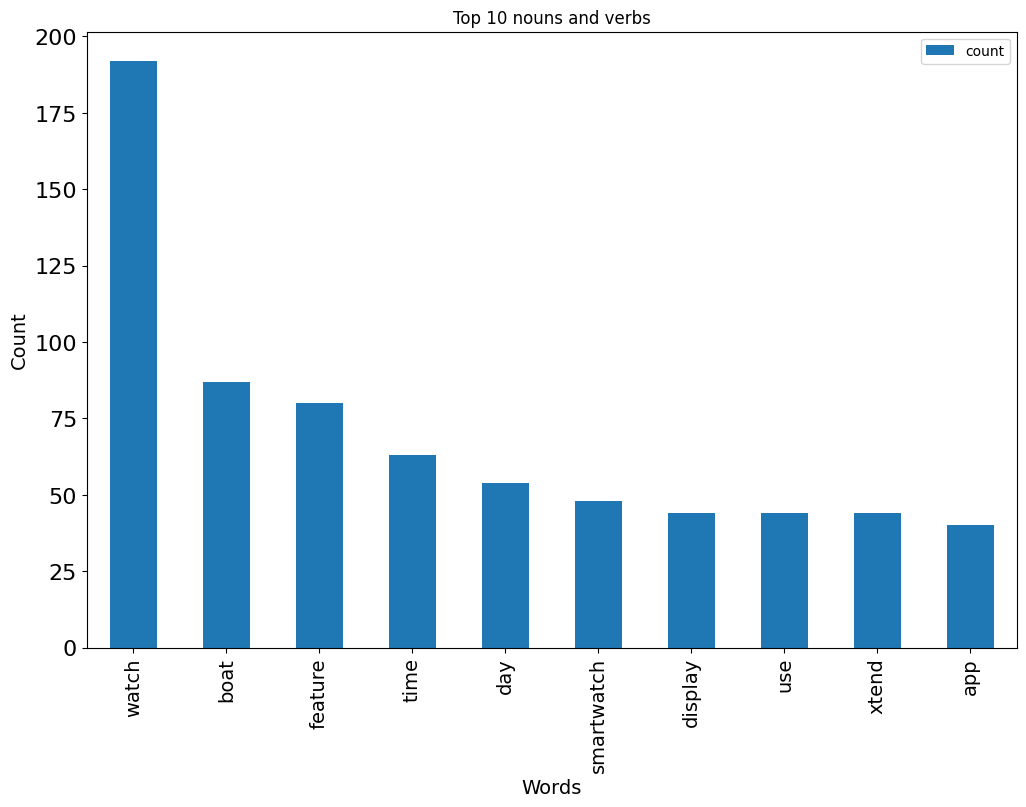

In [88]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


#9. Feature Extraction
**A. BOW Features**

In [89]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#B. TF-IDF Features


In [90]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#10. Fetch sentiments Using TextBlob

In [91]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [92]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos            101
neg              5

#Let's calculate subjectivity and Polarity

In [93]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   

                                   Uncleaned_Reviews  \
0               good smart watch. still working well   
1  this smart (model boat extend plus) watch func...   
2  blood pressure calculation feature missing ..r...   
3  the media could loaded. used watch month now.....   
4  1. good bluetooth calling difficult use blueto...   

                                   Tokenized_Reviews  Subjectivity  Polarity  
0         [good, smart, watch, still, working, well]      0.621429  0.457143  
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452  
2  [blood, pressure, calculation, feature, missin...      0.475000  0.200000  
3  [medium, could, loaded, used, watch, month, bo...      0.472013  0.129274  
4  [good, bluetooth, calling, difficult, use, blu...      0.555556  0.303333

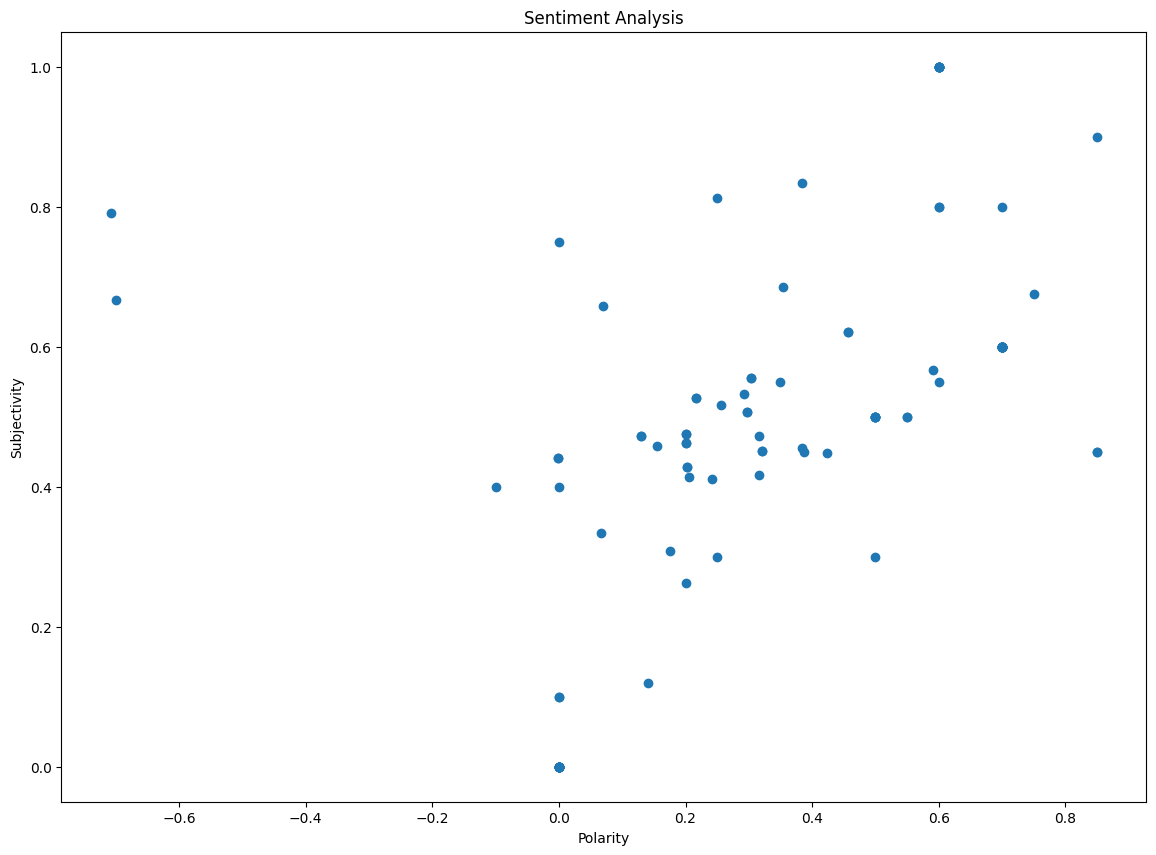

In [94]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');


In [95]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0                good smart watch still working well   
1  smart model boat extend plus watch functioning...   
2  blood pressure calculation feature missing res...   
3  medium could loaded used watch month bought fi...   
4  good bluetooth calling difficult use bluetooth...   

                                   Uncleaned_Reviews  \
0               good smart watch. still working well   
1  this smart (model boat extend plus) watch func...   
2  blood pressure calculation feature missing ..r...   
3  the media could loaded. used watch month now.....   
4  1. good bluetooth calling difficult use blueto...   

                                   Tokenized_Reviews  Subjectivity  Polarity  \
0         [good, smart, watch, still, working, well]      0.621429  0.457143   
1  [smart, model, boat, extend, plus, watch, func...      0.450855  0.320452   
2  [blood, pressure, calculation, feature, missin...      0.475000  0.200000   
3  [medium, could, loaded, used, watch, month, bo...      0.472013  0.129274   
4  [good, bluetooth, calling, difficult, use, blu...      0.555556  0.303333   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

#11. Story Generation and Visualization

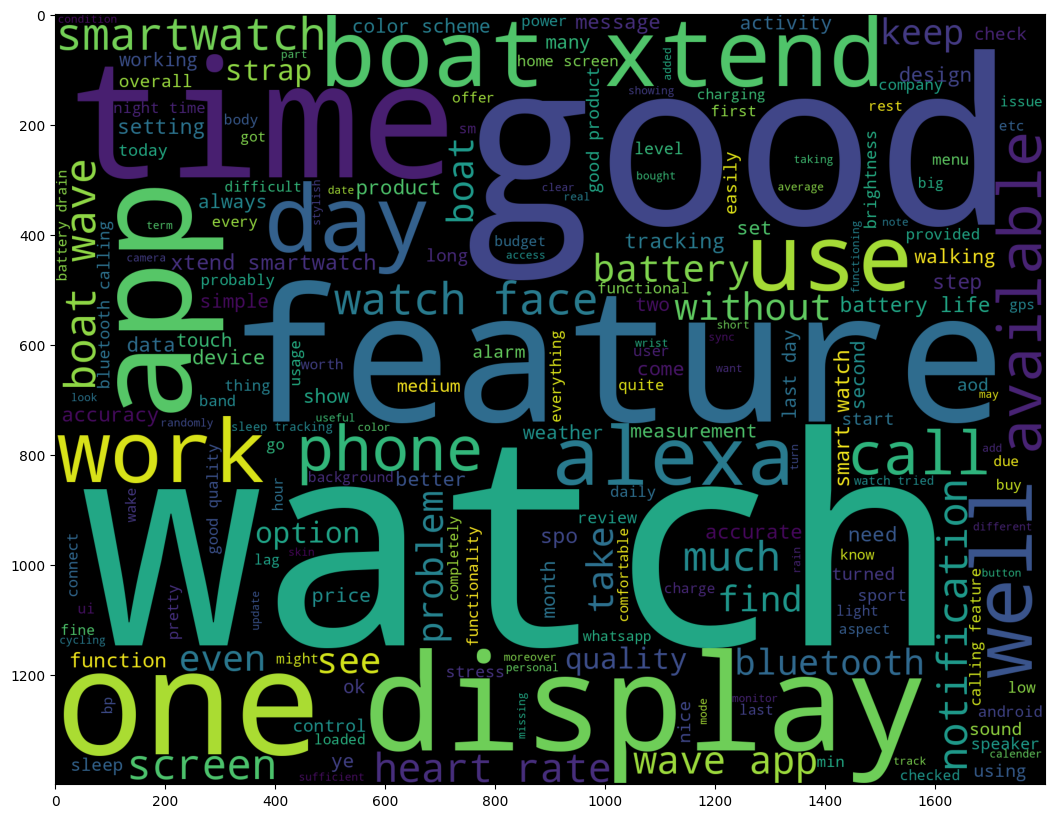

In [96]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

#A. Most common words in positive Review

In [97]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

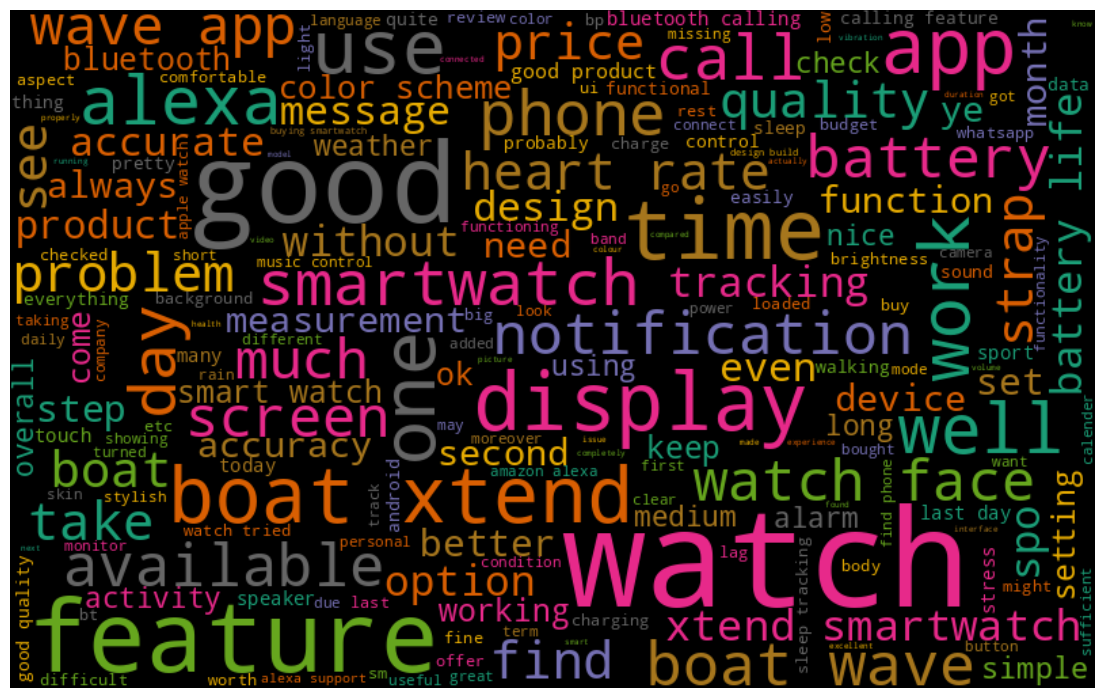

In [98]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

#B. Most common words in negative Review

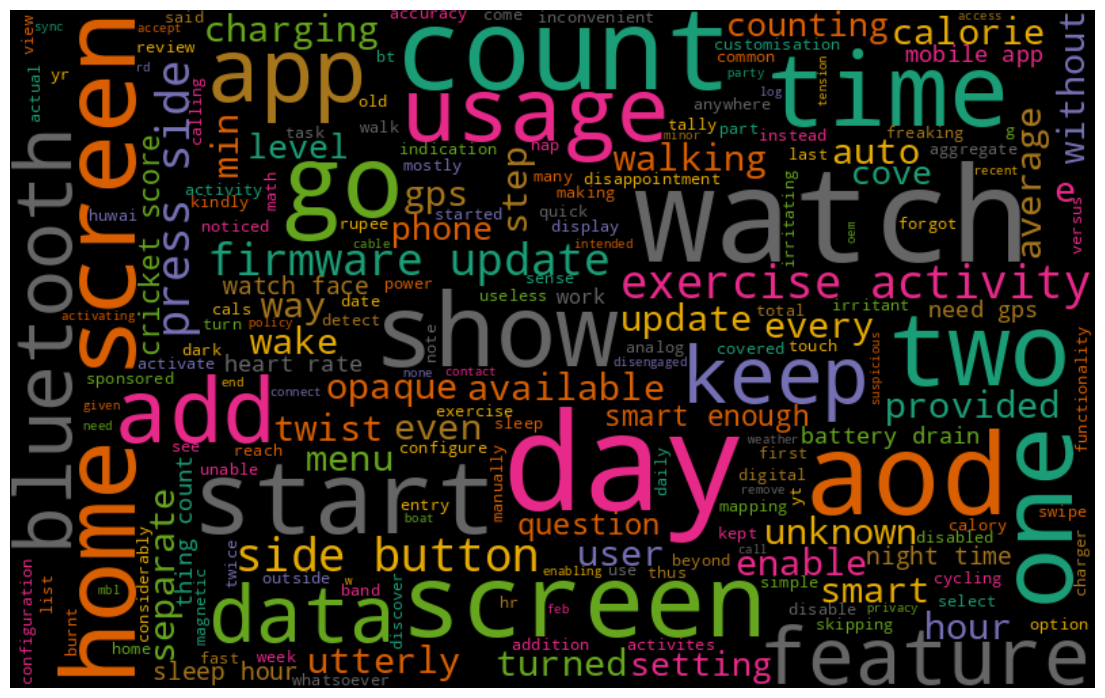

In [100]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

**THE END**